In [1]:
import os
import pandas as pd
import numpy as np

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr,spearmanr
import warnings
warnings.filterwarnings("ignore")#忽略警告

import datetime
from collections import Counter
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from calendar import day_abbr, month_abbr, mdays
# import holidays
# from fbprophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE, r2_score as R2, mean_absolute_percentage_error as MAPE
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [2]:
df=pd.read_csv('./data/preprocessed/data.csv')

In [3]:
df['Date']=pd.to_datetime(df['Date'].astype('str'))
df.set_index('Date',drop=True,inplace=True)

In [4]:
x = df.iloc[:,1:]  # features
x_train=x.loc[:'2022-02-28',:]
x_test=x.loc['2022-03-01':,:]
y = df.loc[:, ['Price']]  # target
y_train=y.loc[:'2022-02-28',:]
y_test=y.loc['2022-03-01':,:]

In [5]:
# Pre-process data
scaler = MinMaxScaler() 
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)

### DT without time offset

In [6]:
def DT(X,Y):    
    for n in X.iloc[:,0:]:
        # Training data
        x = pd.DataFrame(X[str(n)] ) # features
        x_train=x.loc[:'2022-02-28',:]
        X_test=x.loc['2022-03-01':,:]
        y_train=y.loc[:'2022-02-28',:]
        y_test=y.loc['2022-03-01':,:]
        # Train the model
        scaler = StandardScaler() 
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(X_test)
   
        tree_params={'criterion':'friedman_mse','splitter': 'best'}
        model = tree.DecisionTreeRegressor( **tree_params )
 
        model.fit(x_train, y_train)

        # Store the fitted values as a time series with the same time index as
        # the training data
        y_pred = pd.Series(model.predict(x_test).T[0], index=X_test.index)
        print(str(n),'\nMSE:',MSE(y_test,y_pred),'\nr2_score:', R2(y_test,y_pred),'\nMAPE:', MAPE(y_test,y_pred),'\n')


In [7]:
x.isnull().any()

GDP          False
netimport    False
EV           False
EG           False
carbon       False
crude        False
gas          False
temp         False
precip       False
wind         False
dtype: bool

In [8]:
DT(x,y)

GDP 
MSE: 667.9741803278689 
r2_score: -0.04585600559748859 
MAPE: 0.8709593340077125 

netimport 
MSE: 724.4675655737707 
r2_score: -0.13430844579054813 
MAPE: 0.9938808758635751 

EV 
MSE: 1553.035106557377 
r2_score: -1.4316075994127795 
MAPE: 0.7585794335923234 

EG 
MSE: 1085.5099262295082 
r2_score: -0.6995972433029864 
MAPE: 0.4195115783066404 

carbon 
MSE: 639.8353278688522 
r2_score: -0.0017986322714129699 
MAPE: 0.7366272588819063 

crude 
MSE: 1085.5099262295082 
r2_score: -0.6995972433029864 
MAPE: 0.4195115783066404 

gas 
MSE: 1101.2890918032788 
r2_score: -0.7243028914622385 
MAPE: 0.42667525044456384 

temp 
MSE: 1074.836238295082 
r2_score: -0.6828853089844866 
MAPE: 0.4160866203210812 

precip 
MSE: 1187.5669672131148 
r2_score: -0.8593893016933618 
MAPE: 0.48734195677358466 

wind 
MSE: 1185.2266475409835 
r2_score: -0.8557250322407384 
MAPE: 0.4854732996163396 



In [9]:
xtrain=x_train.copy()
xtest=x_test.copy()
ytrain=y_train.copy()
ytest=y_test.copy()

In [10]:
X_train=xtrain.loc[:,['carbon']]
X_test=xtest.loc[:,['carbon']]
# Train the model
scaler = StandardScaler() 
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

tree_params={'criterion':'friedman_mse','splitter': 'best'}
model = tree.DecisionTreeRegressor( **tree_params )
model.fit(X_train, ytrain)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X_test).T[0], index=xtest.index)
print('MSE:',MSE(ytest,y_pred),'\nr2_score:', R2(ytest,y_pred),'\nMAPE:', MAPE(ytest,y_pred),'\n')

MSE: 639.8353278688522 
r2_score: -0.0017986322714129699 
MAPE: 0.7366272588819063 



In [11]:
y_pred.name='Price_pred'

In [12]:
ytest.name='Price_true'

In [13]:
res=pd.concat([X_test,ytest,y_pred],axis=1)

In [14]:
res

,carbon,Price,Price_pred
Date,,,
2022-03-01,79.960000,13.68,37.34
2022-03-02,72.575429,13.28,37.34
2022-03-03,63.870000,20.63,37.34
2022-03-04,59.719148,23.72,37.34
2022-03-05,56.685318,14.89,37.34
...,...,...,...
2022-04-26,83.430000,23.94,37.34
2022-04-27,81.615707,43.43,37.34
2022-04-28,80.550000,19.30,37.34


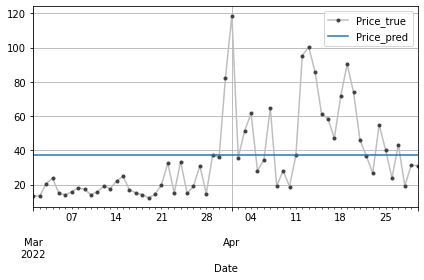

In [15]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
    linewidth=1.5
)
ytest.columns=['Price_true']
ytest.plot(**plot_params)
y_pred.plot(label='Price_pred')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()

### Linear regression with time offset

#### autoregression

In [16]:
shift=1
Df=df.copy()
Df['Lag_1'] = Df['Price'].shift(shift)
Df = Df.reindex(columns=['Price', 'Lag_1'])
X = Df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = Df.loc[:, ['Price']]  # create the target
y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target

In [17]:
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)

In [18]:
shift=6
X=make_lags(pd.DataFrame(df.Price), lags=shift).dropna()
y=pd.DataFrame(df.Price)
y, X = y.align(X, join='inner', axis=0)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=61, shuffle=False)
tree_params={'criterion':'friedman_mse'}
model = tree.DecisionTreeRegressor( **tree_params )
model.fit(x_train, y_train)

y_pred = pd.Series(model.predict(x_test), index=x_test.index)
print('MSE:',MSE(y_test,y_pred),'\nr2_score:', R2(y_test,y_pred),'\nMAPE:', MAPE(y_test,y_pred),'\n')

MSE: 361.96238524590166 
r2_score: 0.4332707078228606 
MAPE: 0.44235806526034965 



In [19]:
y_test

,Price
Date,
2022-03-01,13.68
2022-03-02,13.28
2022-03-03,20.63
2022-03-04,23.72
2022-03-05,14.89
...,...
2022-04-26,23.94
2022-04-27,43.43
2022-04-28,19.30


In [20]:
def DTshift(shift):  

    Df=df.copy()
    X=make_lags(pd.DataFrame(df.Price), lags=shift).dropna()
    y=pd.DataFrame(df.Price)
    y, X = y.align(X, join='inner', axis=0)

    x_train=X.loc[:'2022-02-28',:]
    x_test=X.loc['2022-03-01':,:]
    y_train=y.loc[:'2022-02-28',:]
    y_test=y.loc['2022-03-01':,:]
    tree_params={'criterion':'squared_error'}
    model = tree.DecisionTreeRegressor( **tree_params )
    model.fit(x_train, y_train)

    y_pred = pd.Series(model.predict(x_test).T[0], index=x_test.index)
    print('MSE:',MSE(y_test,y_pred),'\nr2_score:', R2(y_test,y_pred),'\nMAPE:', MAPE(y_test,y_pred),'\n')

In [21]:
DTshift(5)

MSE: 901.392206557377 
r2_score: -0.41132169534468543 
MAPE: 0.40262778131020915 



In [22]:
Df=df.copy()
X=make_lags(pd.DataFrame(df.Price), lags=6).dropna()
y=pd.DataFrame(df.Price)
y, X = y.align(X, join='inner', axis=0)

# x_trainl=X.loc['2019-01-02':'2022-01-31',:]
# x_testl=X.loc['2022-02-01':'2022-04-30',:]
# y_trainl=y.loc['2019-01-02':'2022-01-31',:]
# y_testl=y.loc['2022-02-01':'2022-04-30',:]
x_trainl=X.loc[:'2022-02-28',:]
x_testl=X.loc['2022-03-01':,:]
y_trainl=y.loc[:'2022-02-28',:]
y_testl=y.loc['2022-03-01':,:]

tree_params={'criterion':'squared_error'}
model = tree.DecisionTreeRegressor( **tree_params )
model.fit(x_trainl, y_trainl)

y_predl = pd.Series(model.predict(x_testl), index=x_testl.index)

print('MSE:%f, r2 score:%f and MAPE:%f' %(MSE(y_testl,y_predl), R2(y_testl,y_predl),MAPE(y_testl,y_predl)))

MSE:406.277730, r2 score:0.363886 and MAPE:0.460092


In [23]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
    linewidth=1.5
)

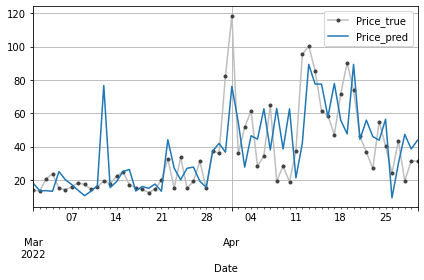

In [24]:
y_testl.columns=['Price_true']
ax = y_testl.plot(**plot_params)
ax = y_predl.plot(label='Price_pred')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

residual Mean: -0.063115,Median: -1.240000, skewness 0.153321, kurtosis: 1.447847


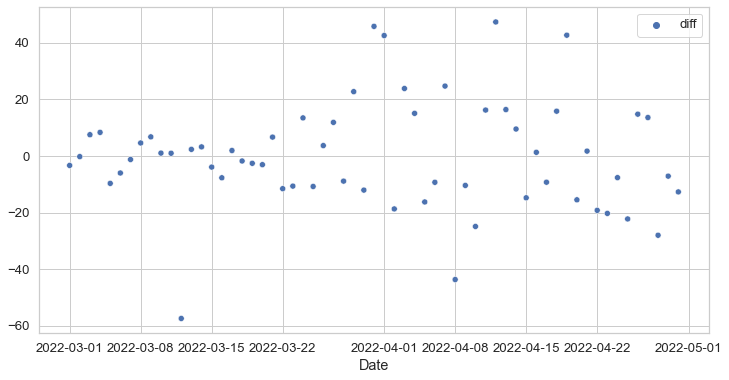

In [25]:
y_pred=pd.DataFrame(y_pred,columns=['Price_pred'])
y_test=pd.DataFrame(y_test,columns=['Price'])
residual=y_test.Price-y_pred.Price_pred
residual=pd.DataFrame(residual,columns=['diff'])
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.set_context('notebook', font_scale=1.2, rc={'lines.linewidth':1}) 
sns.scatterplot(data=residual)
print('residual Mean: %f,Median: %f, skewness %f, kurtosis: %f' 
      %(residual.mean(),residual.median(),residual.skew(),residual.kurt()))

#### regression with elements

In [26]:
def DT2(Df,n):
    df=Df.copy()
    df['Lag_1'] = df['Price'].shift(1)
    df['Lag '+n] = df[n].shift(1)
    df1 = df.reindex(columns=['Price','Lag'+n, 'Lag_1'])
    X = df.loc[:, ['Lag '+n,'Lag_1']]
    X.dropna(inplace=True)  # drop missing values in the feature set
    y = df.loc[:, ['Price']]  # create the target
    y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target
#     x_train=X.loc['2019-01-02':'2022-01-31',:]
#     x_test=X.loc['2022-02-01':'2022-04-30',:]
#     y_train=y.loc['2019-01-02':'2022-01-31',:]
#     y_test=y.loc['2022-02-01':'2022-04-30',:]
    x_train=X.loc[:'2022-02-28',:]
    x_test=X.loc['2022-03-01':,:]
    y_train=y.loc[:'2022-02-28',:]
    y_test=y.loc['2022-03-01':,:]
    scaler = MinMaxScaler() 
    x_train1 = scaler.fit_transform(x_train)
    x_test1 = scaler.transform(x_test)
    scaler = StandardScaler()
    x_train2 = scaler.fit_transform(x_train)
    x_test2 = scaler.transform(x_test)

    tree_params={'criterion':'squared_error'}
    model = tree.DecisionTreeRegressor( **tree_params )
    model.fit(x_train1, y_train)

    y_pred = pd.Series(model.predict(x_test1), index=x_test.index)
    print('MSE:%f, r2 score:%f and MAPE:%f \n' %(MSE(y_test,y_pred), R2(y_test,y_pred),MAPE(y_test,y_pred)))

    fig, ax = plt.subplots()
    ax = sns.regplot(x='Lag '+n, y='Price', data=df, ci=None, scatter_kws=dict(color='0.25'))
    ax.set_title('Lag '+n+' of Power Price')
    
#     plt.plot(x_test['Lag'+n],y_test, '.', color='0.25')
#     plt.plot(x_test['Lag'+n],y_pred)
# #     plt.set_aspect('equal')
#     plt.ylabel('Price')
#     plt.xlabel('Lag '+n)
#     plt.title('Lag Plot of Power Price');
    
    plot_params = dict(
        color="0.75",
        style=".-",
        markeredgecolor="0.25",
        markerfacecolor="0.25",
        legend=False,
        linewidth=1.5
    )
    y_test.plot(**plot_params)
    y_pred.plot()
    plt.grid()
    plt.tight_layout()

In [27]:
df.columns[1:]

Index(['GDP', 'netimport', 'EV', 'EG', 'carbon', 'crude', 'gas', 'temp',
       'precip', 'wind'],
      dtype='object')

MSE:661.345648, r2 score:-0.035478 and MAPE:0.528919 

MSE:1022.419002, r2 score:-0.600815 and MAPE:0.690307 

MSE:709.366848, r2 score:-0.110665 and MAPE:0.466405 

MSE:1304.170285, r2 score:-1.041957 and MAPE:0.703017 

MSE:911.650002, r2 score:-0.427382 and MAPE:0.610576 

MSE:1079.616161, r2 score:-0.690369 and MAPE:0.692842 

MSE:1062.458844, r2 score:-0.663506 and MAPE:0.663597 

MSE:629.875454, r2 score:0.013796 and MAPE:0.470058 

MSE:605.976308, r2 score:0.051215 and MAPE:0.483758 

MSE:691.891474, r2 score:-0.083304 and MAPE:0.518273 



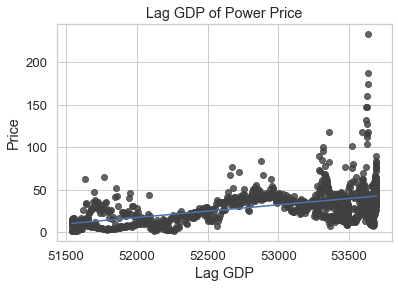

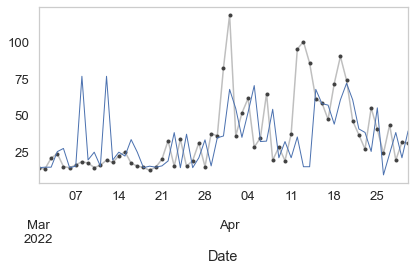

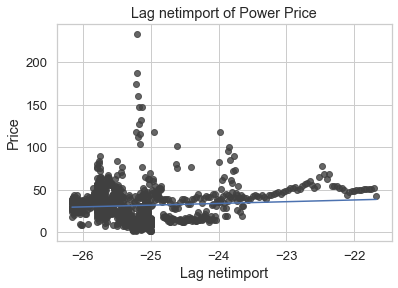

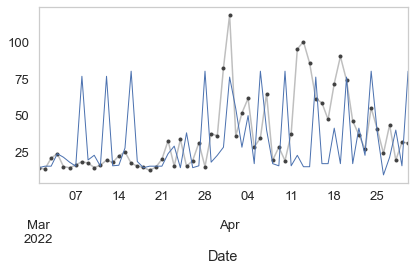

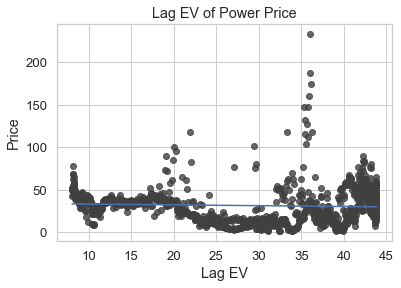

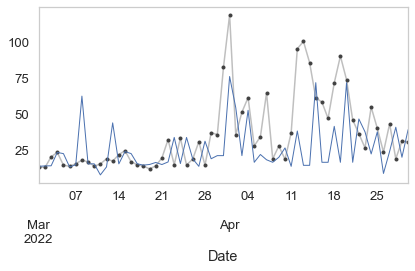

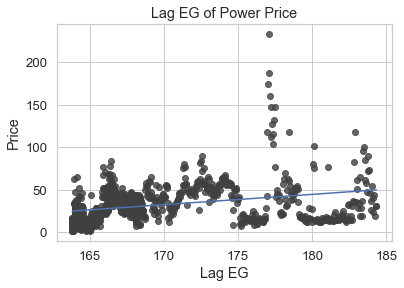

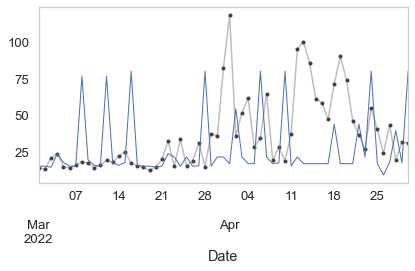

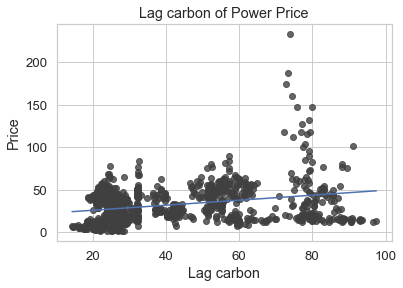

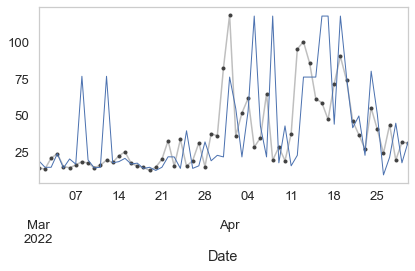

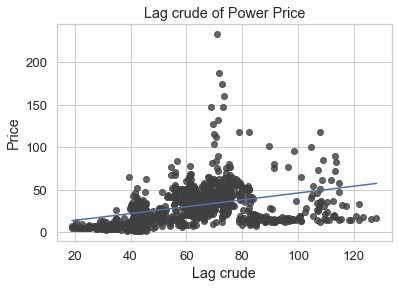

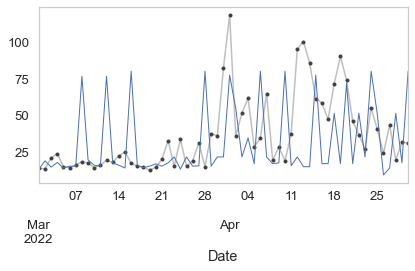

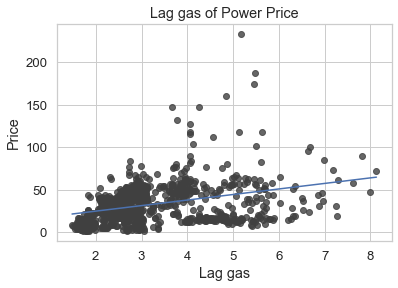

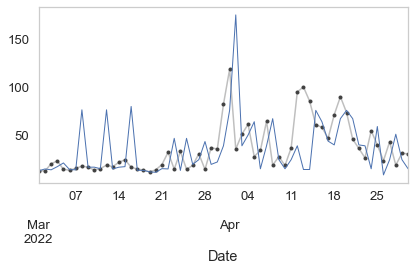

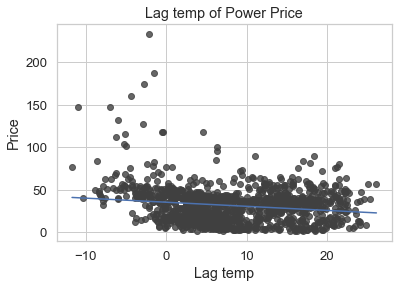

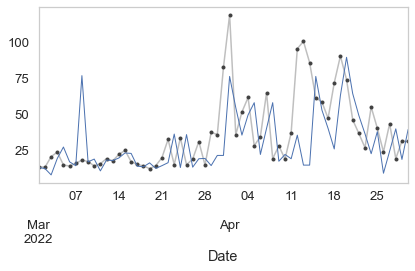

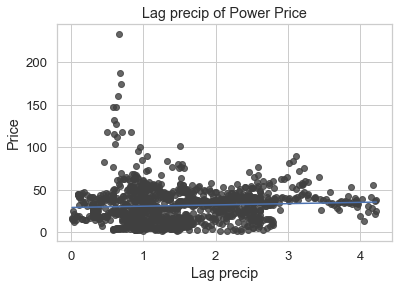

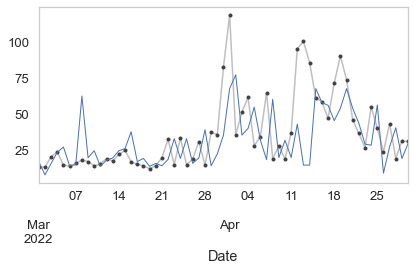

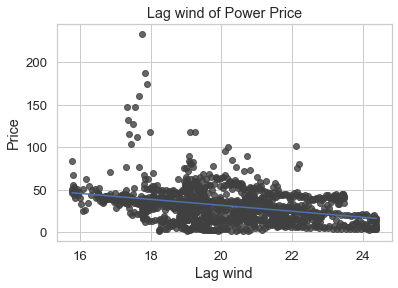

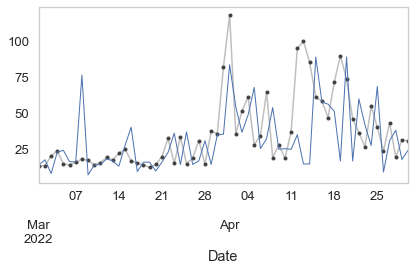

In [28]:
for name in df.columns[1:]:
    DT2(df,name)

In [29]:
def DT3(Df,n):
    df=Df.copy()
    for m in range(1,31):
        df['Lag_1'] = df['Price'].shift(1)
        df['Lag_2'] = df['Price'].shift(2)
        df['Lag_3'] = df['Price'].shift(3)
        df['Lag_4'] = df['Price'].shift(4)
        df['Lag_5'] = df['Price'].shift(5)
        df['Lag_6'] = df['Price'].shift(6)
        df['Lag '+n] = df[n].shift(m)
        df1 = df.reindex(columns=['Price','Lag'+n, 'Lag_1'])
        X = df.loc[:, ['Lag_1','Lag_2','Lag_3','Lag_4','Lag_5','Lag_6','Lag '+n]]
        X.dropna(inplace=True)  # drop missing values in the feature set
        y = df.loc[:, ['Price']]  # create the target
        y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target
    #     x_train=X.loc['2019-01-02':'2022-01-31',:]
    #     x_test=X.loc['2022-02-01':'2022-04-30',:]
    #     y_train=y.loc['2019-01-02':'2022-01-31',:]
    #     y_test=y.loc['2022-02-01':'2022-04-30',:]win
        x_train=X.loc[:'2022-02-28',:]
        x_test=X.loc['2022-03-01':,:]
        y_train=y.loc[:'2022-02-28',:]
        y_test=y.loc['2022-03-01':,:]
        scaler = MinMaxScaler() 
        x_train1 = scaler.fit_transform(x_train)
        x_test1 = scaler.transform(x_test)
        scaler = StandardScaler()
        x_train2 = scaler.fit_transform(x_train)
        x_test2 = scaler.transform(x_test)
        tree_params={'criterion':'squared_error'}
        model = tree.DecisionTreeRegressor( **tree_params,random_state=1 )
        model.fit(x_train1, y_train)

        y_pred = pd.Series(model.predict(x_test1), index=x_test.index)
        print('%d MSE:%f, r2 score:%f and MAPE:%f \n' %(m, MSE(y_test,y_pred), R2(y_test,y_pred),MAPE(y_test,y_pred)))


In [30]:
DT3(df,'gas')

1 MSE:857.557097, r2 score:-0.342688 and MAPE:0.605512 

2 MSE:1042.824049, r2 score:-0.632763 and MAPE:0.538554 

3 MSE:496.722631, r2 score:0.222275 and MAPE:0.558164 

4 MSE:394.242300, r2 score:0.382730 and MAPE:0.411372 

5 MSE:468.176364, r2 score:0.266970 and MAPE:0.487414 

6 MSE:522.933364, r2 score:0.181236 and MAPE:0.488885 

7 MSE:457.853038, r2 score:0.283133 and MAPE:0.467408 

8 MSE:555.942467, r2 score:0.129554 and MAPE:0.524179 

9 MSE:389.658910, r2 score:0.389906 and MAPE:0.428696 

10 MSE:426.749292, r2 score:0.331833 and MAPE:0.427177 

11 MSE:400.386938, r2 score:0.373109 and MAPE:0.392972 

12 MSE:537.936705, r2 score:0.157745 and MAPE:0.503732 

13 MSE:464.422289, r2 score:0.272848 and MAPE:0.472785 

14 MSE:484.074862, r2 score:0.242078 and MAPE:0.462364 

15 MSE:563.315039, r2 score:0.118010 and MAPE:0.574797 

16 MSE:605.803713, r2 score:0.051485 and MAPE:0.530563 

17 MSE:553.613236, r2 score:0.133200 and MAPE:0.482470 

18 MSE:568.651584, r2 score:0.109655 

In [31]:
Df=df.copy()
Df['Lag_1'] = Df['Price'].shift(1)
Df['Lag_2'] = Df['Price'].shift(2)
Df['Lag_3'] = Df['Price'].shift(3)
Df['Lag_4'] = Df['Price'].shift(4)
Df['Lag_5'] = Df['Price'].shift(5)
Df['Lag_6'] = Df['Price'].shift(6)
Df = Df.reindex(columns=['Price', 'Lag_1','Lag_2','Lag_3','Lag_4','Lag_5','Lag_6']).dropna()

In [32]:
df1=Df.copy()

In [33]:
df1

,Price,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6
Date,,,,,,,
2019-01-07,51.19,51.02,50.72,50.85,51.90,42.65,22.58
2019-01-08,49.50,51.19,51.02,50.72,50.85,51.90,42.65
2019-01-09,50.07,49.50,51.19,51.02,50.72,50.85,51.90
2019-01-10,50.10,50.07,49.50,51.19,51.02,50.72,50.85
2019-01-11,48.43,50.10,50.07,49.50,51.19,51.02,50.72
...,...,...,...,...,...,...,...
2022-04-26,23.94,40.27,55.01,26.81,36.64,46.10,73.87
2022-04-27,43.43,23.94,40.27,55.01,26.81,36.64,46.10
2022-04-28,19.30,43.43,23.94,40.27,55.01,26.81,36.64


In [34]:
n='wind'
df1['Lag '+n] = df[n].shift(10) 
X = df1.iloc[:, 1:]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, ['Price']]  # create the target
y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target

x_train=X.loc[:'2022-02-28',:]
x_test=X.loc['2022-03-01':,:]
y_train=y.loc[:'2022-02-28',:]
y_test=y.loc['2022-03-01':,:]
scaler = MinMaxScaler() 
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)

tree_params={'criterion':'squared_error'}
model = tree.DecisionTreeRegressor( **tree_params ,random_state=1)
model.fit(x_train1, y_train)
y_pred = pd.Series(model.predict(x_test1), index=x_test.index)
print('MSE:%f, r2 score:%f and MAPE:%f \n' %(MSE(y_test,y_pred), R2(y_test,y_pred),MAPE(y_test,y_pred)))


MSE:352.429723, r2 score:0.448196 and MAPE:0.400748 



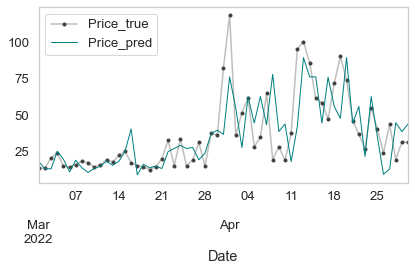

In [35]:
y_test.columns=['Price_true']
ax = y_test.plot(**plot_params)
ax = y_pred.plot(label='Price_pred',color='teal')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

residual Mean: 0.869016,Median: 0.280000, skewness 0.248416, kurtosis: 1.910942


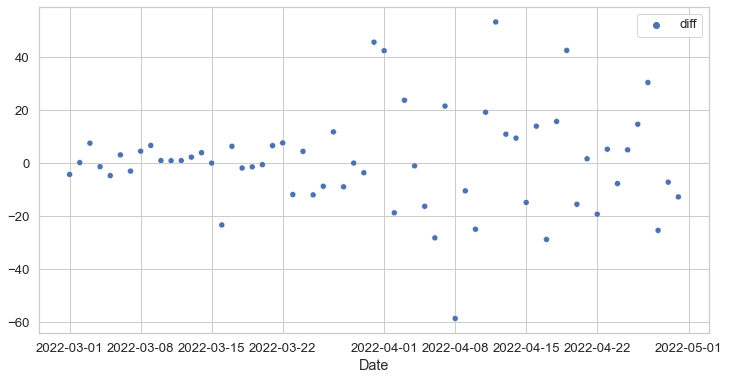

In [36]:
y_pred=pd.DataFrame(y_pred,columns=['Price_pred'])
y_test=pd.DataFrame(y_test,columns=['Price_true'])
residual=y_test.Price_true-y_pred.Price_pred
residual=pd.DataFrame(residual,columns=['diff'])
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.set_context('notebook', font_scale=1.2, rc={'lines.linewidth':1}) 
sns.scatterplot(data=residual)
print('residual Mean: %f,Median: %f, skewness %f, kurtosis: %f' 
      %(residual.mean(),residual.median(),residual.skew(),residual.kurt()))

In [37]:
df2=df1.copy()

In [38]:
df1=df2.copy()

Power prices (target data itself) 6 MSE:361.578567, r2 score:0.433872 and MAPE:0.396380

Wind speed 10MSE:352.429723, r2 score:0.448196 and MAPE:0.400748 

Temperature 1MSE:355.058448, r2 score:0.444080 and MAPE:0.408043 
